# Data Series

A data series is an ordered collection, often with respect to time.

Examples:
- Temperatures throughout the year
- Height/weight throughout a lifetime
- Stock prices across time
- Physiological signals (EEG, ECG, pulse rate, ...)
- Sound or video

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/life_expectancy_time_series.png">

If order is important, then what you have is a time series
- Doesn’t actually have to be throughout time!



# Time Series Data Analysis

Let's look at Google trends data of keywords 'diet', 'gym' and 'finance' to see how they vary over time. Could there be more searches for these terms in January when we're all trying to turn over a new leaf? 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

In [10]:
#Import the data and see what's in it

df = pd.read_csv('https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/multiTimeline.csv', skiprows=1)
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [11]:
#Use the .info() method to check out your data types, number of rows and more

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
month      168 non-null object
diet       168 non-null int64
gym        168 non-null int64
finance    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [12]:
#Turn the 'month' column into a datetime data type and make it the index of the DataFrame
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


#### Exercise

Use the pandas [built-in visualization method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) to plot your data as 3 line plots on a single figure (one for each column).

Text(0,0.5,'# of Searches')

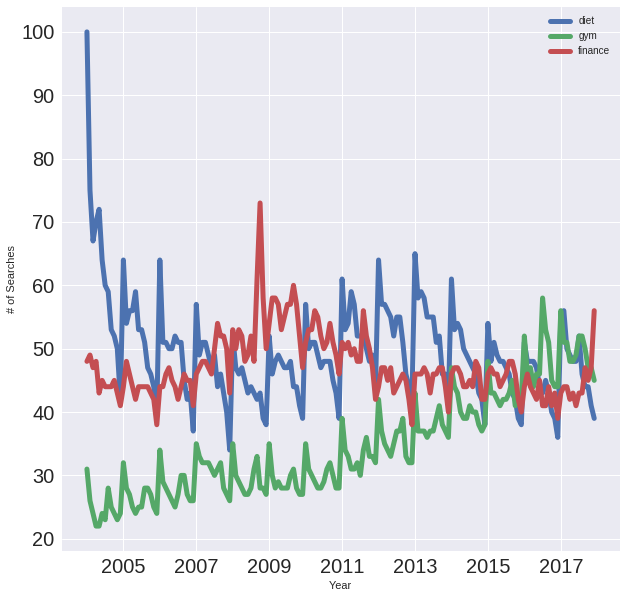

In [28]:
df.plot(figsize=(10,10), linewidth=5, fontsize=20)
plt.xlabel("Year")
plt.ylabel("# of Searches")

#### Exercise

Plot the 'diet' column by itself as a time series.

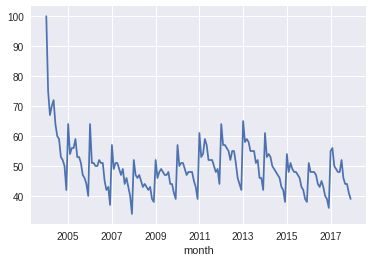

In [20]:
df["diet"].plot()

 It looks like there are trends and seasonal components to these time series.

## Identifying Trends

One popular way of identifying (long-term) trends is to taking a rolling average.  This means that, for each time point, we take the average of the points on either side of it (the number of points is specified by a window size, which you need to choose).

#### Exercise

Plot the rolling average of both 'diet'and 'gym' using [built-in pandas methods](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html). What window size does it make sense to use?

Text(0,0.5,'# of Searches')

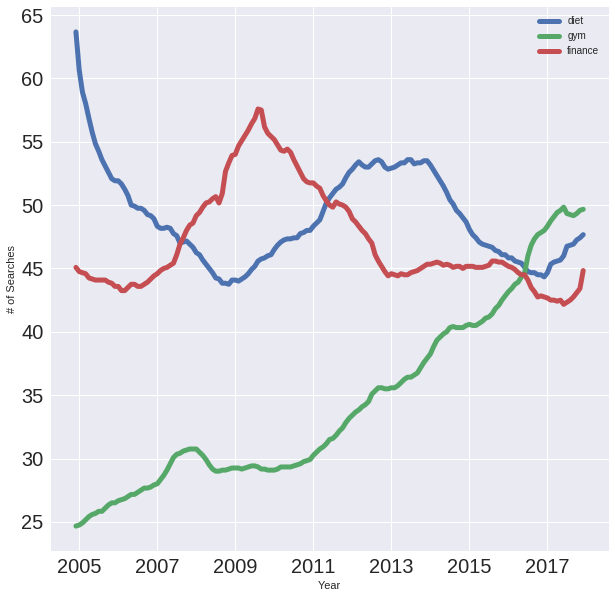

In [34]:
diet = df[["diet"]]
gym = df[["gym"]]
finance = df[["finance"]]
window = 12

df_rm = pd.concat([diet.rolling(window).mean(), gym.rolling(window).mean(), finance.rolling(window).mean()], axis=1)
df_rm.plot(figsize=(10,10), linewidth = 5, fontsize = 20)
plt.xlabel("Year")
plt.ylabel("# of Searches")

###  Seasonal Patterns

You can remove the trend from a time series to investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over. Another way to remove the trend is called __differencing__, where you look at the difference between successive data points (called first-order differencing).

#### Exercise

Use pandas to compute and plot the [first order difference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html) of the 'diet' series

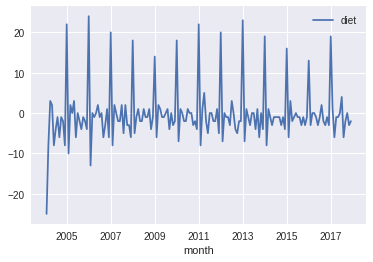

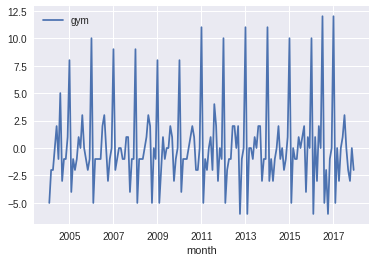

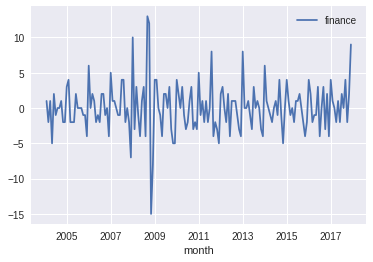

In [41]:
diet.diff().plot()
gym.diff().plot()
finance.diff().plot()

See that you have removed much of the trend and you can really see the peaks that occur twice a year.  What does this mean?

Differencing is super helpful in turning your time series into a __stationary time series__. A stationary time series is one whose statistical properties (such as mean & variance) don't change over time. Stationary time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

## Periodicity and Autocorrelation


A time series is *periodic* if it repeats itself at equally spaced intervals, say, every 12 months. Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that. Yet another way of thinking about this is that the time series is correlated with itself shifted by 12 months.

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation. We'll get to this in a minute. First, let's remind ourselves about correlation:

### Correlation

The correlation coefficient of two variables captures how linearly related they are.

#### Exercise

Compute the [correlation coefficients](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) of all of these time series and interpret the results.

In [37]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


#### Answer

((YOUR ANSWER HERE))

#### Exercise

Now plot the first-order differences of these time series and then compute the correlation coefficients. Removing the trend may reveal correlation in seasonality. Interpret the results.

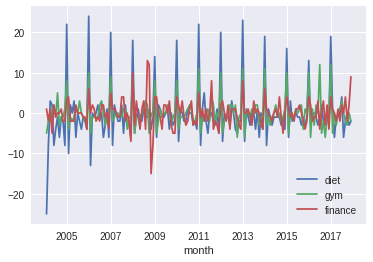

In [42]:
df.diff().plot()

#### Answer

((YOUR ANSWER HERE))

###  Autocorrelation

Let's now plot the autocorrelation of the 'diet' series: on the x-axis you have the lag and on the y-axis you have how correlated the time series is with itself at that lag. For example, if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

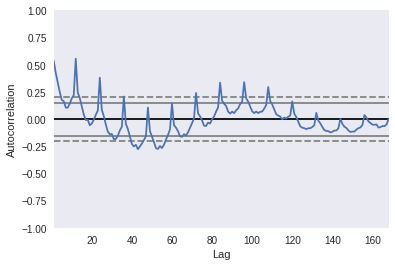

In [38]:
pd.plotting.autocorrelation_plot(diet);

#### Exercise

Interpret the results.

#### Answer

((YOUR ANSWER HERE))